In [98]:
# from google.colab import drive
# drive.mount('/content/drive')

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std
import scipy
import datetime
from scipy.optimize import minimize
%matplotlib inline

In [100]:
data = pd.read_csv("data/adjprice.csv")

In [101]:
# data = pd.read_csv("/content/drive/Shareddrives/ADS2002 Portfolio Optimisation/Data/adjprice.csv")

In [102]:
data.head()

,Date,0111145D US Equity,0202445Q US Equity,0203524D US Equity,0226226D US Equity,0376152D US Equity,0440296D US Equity,0544749D US Equity,0574018D US Equity,0598884D US Equity,...,YNR US Equity,YRCW US Equity,YUM US Equity,YUMC US Equity,ZBH US Equity,ZETHQ US Equity,ZION US Equity,ZRN US Equity,ZTS US Equity,ZTS-W US Equity
0,19930907,13.2719,13.6829,8.4429,8.1042,11.000,57.3245,17.8887,6.8315,28.1246,...,NaN,144439.5121,NaN,NaN,NaN,6.875,7.1675,30.7970,NaN,NaN
1,19930908,13.3263,13.5315,8.2147,7.9590,11.000,57.2096,17.8064,6.8315,27.5051,...,NaN,143691.1208,NaN,NaN,NaN,6.750,6.9766,30.0188,NaN,NaN
2,19930909,13.7070,13.3800,8.7852,8.0627,11.125,59.1625,17.6831,6.8315,27.7529,...,NaN,143691.1208,NaN,NaN,NaN,6.625,6.9554,30.0188,NaN,NaN
3,19930910,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
4,19930911,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN


In [103]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')
data

,Date,0111145D US Equity,0202445Q US Equity,0203524D US Equity,0226226D US Equity,0376152D US Equity,0440296D US Equity,0544749D US Equity,0574018D US Equity,0598884D US Equity,...,YNR US Equity,YRCW US Equity,YUM US Equity,YUMC US Equity,ZBH US Equity,ZETHQ US Equity,ZION US Equity,ZRN US Equity,ZTS US Equity,ZTS-W US Equity
0,1993-09-07,13.2719,13.6829,8.4429,8.1042,11.000,57.3245,17.8887,6.8315,28.1246,...,NaN,144439.5121,NaN,NaN,NaN,6.875,7.1675,30.7970,NaN,NaN
1,1993-09-08,13.3263,13.5315,8.2147,7.9590,11.000,57.2096,17.8064,6.8315,27.5051,...,NaN,143691.1208,NaN,NaN,NaN,6.750,6.9766,30.0188,NaN,NaN
2,1993-09-09,13.7070,13.3800,8.7852,8.0627,11.125,59.1625,17.6831,6.8315,27.7529,...,NaN,143691.1208,NaN,NaN,NaN,6.625,6.9554,30.0188,NaN,NaN
3,1993-09-10,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
4,1993-09-11,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,2019-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9455,2019-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9456,2019-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,114.10,45.43,134.53,NaN,44.6500,NaN,115.55,NaN
9457,2019-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,113.24,44.00,136.67,NaN,45.4800,NaN,115.79,NaN


In [104]:
t_list = data.columns
tf_list = t_list[1:]

In [105]:
a_list =[]
for i in tf_list:
  a_list.append(i)
a_list

['0111145D US Equity',
 '0202445Q US Equity',
 '0203524D US Equity',
 '0226226D US Equity',
 '0376152D US Equity',
 '0440296D US Equity',
 '0544749D US Equity',
 '0574018D US Equity',
 '0598884D US Equity',
 '0772031D US Equity',
 '0820143D US Equity',
 '0848680D US Equity',
 '0867887D US Equity',
 '0872237D US Equity',
 '0910150D US Equity',
 '0943554D US Equity',
 '0948669D US Equity',
 '0961514D US Equity',
 '0964591D US Equity',
 '1005945D US Equity',
 '1013207D US Equity',
 '1028411Q US Equity',
 '1040983D US Equity',
 '1051665D US Equity',
 '1073675D US Equity',
 '1086832D US Equity',
 '1166Q US Equity',
 '1199Q US Equity',
 '1237Q US Equity',
 '1255173D US Equity',
 '1255177D US Equity',
 '1255459D US Equity',
 '126784Q US Equity',
 '1270Q US Equity',
 '1280712D US Equity',
 '1281683D US Equity',
 '1284849D US Equity',
 '1288453D US Equity',
 '1288652D US Equity',
 '1291Q US Equity',
 '1293405D US Equity',
 '1297Q US Equity',
 '1312089D US Equity',
 '1317355D US Equity',
 '1327Q

In [106]:
j = 0
for i in a_list:
  i = i[:-10]
  a_list[j] = i
  j+=1
a_list

['0111145D',
 '0202445Q',
 '0203524D',
 '0226226D',
 '0376152D',
 '0440296D',
 '0544749D',
 '0574018D',
 '0598884D',
 '0772031D',
 '0820143D',
 '0848680D',
 '0867887D',
 '0872237D',
 '0910150D',
 '0943554D',
 '0948669D',
 '0961514D',
 '0964591D',
 '1005945D',
 '1013207D',
 '1028411Q',
 '1040983D',
 '1051665D',
 '1073675D',
 '1086832D',
 '1166Q',
 '1199Q',
 '1237Q',
 '1255173D',
 '1255177D',
 '1255459D',
 '126784Q',
 '1270Q',
 '1280712D',
 '1281683D',
 '1284849D',
 '1288453D',
 '1288652D',
 '1291Q',
 '1293405D',
 '1297Q',
 '1312089D',
 '1317355D',
 '1327Q',
 '134618Q',
 '1356Q',
 '1377Q',
 '140402Q',
 '1423Q',
 '1431816D',
 '1436513D',
 '1448062D',
 '1455Q',
 '1456Q',
 '1463Q',
 '1500785D',
 '1511Q',
 '1513Q',
 '1518855D',
 '1519128D',
 '1520415D',
 '1524867D',
 '1528159D',
 '1530Q',
 '1539547D',
 '1539941D',
 '1541931D',
 '1558530D',
 '1566019D',
 '1567Q',
 '1581Q',
 '1618Q',
 '162007Q',
 '1621582D',
 '1624Q',
 '1627457D',
 '1649858D',
 '1654539D',
 '1671Q',
 '1680Q',
 '1719Q',
 '1802Q

In [107]:
a_list.insert(0, 'Date')
a_list

['Date',
 '0111145D',
 '0202445Q',
 '0203524D',
 '0226226D',
 '0376152D',
 '0440296D',
 '0544749D',
 '0574018D',
 '0598884D',
 '0772031D',
 '0820143D',
 '0848680D',
 '0867887D',
 '0872237D',
 '0910150D',
 '0943554D',
 '0948669D',
 '0961514D',
 '0964591D',
 '1005945D',
 '1013207D',
 '1028411Q',
 '1040983D',
 '1051665D',
 '1073675D',
 '1086832D',
 '1166Q',
 '1199Q',
 '1237Q',
 '1255173D',
 '1255177D',
 '1255459D',
 '126784Q',
 '1270Q',
 '1280712D',
 '1281683D',
 '1284849D',
 '1288453D',
 '1288652D',
 '1291Q',
 '1293405D',
 '1297Q',
 '1312089D',
 '1317355D',
 '1327Q',
 '134618Q',
 '1356Q',
 '1377Q',
 '140402Q',
 '1423Q',
 '1431816D',
 '1436513D',
 '1448062D',
 '1455Q',
 '1456Q',
 '1463Q',
 '1500785D',
 '1511Q',
 '1513Q',
 '1518855D',
 '1519128D',
 '1520415D',
 '1524867D',
 '1528159D',
 '1530Q',
 '1539547D',
 '1539941D',
 '1541931D',
 '1558530D',
 '1566019D',
 '1567Q',
 '1581Q',
 '1618Q',
 '162007Q',
 '1621582D',
 '1624Q',
 '1627457D',
 '1649858D',
 '1654539D',
 '1671Q',
 '1680Q',
 '1719Q'

In [108]:
data.columns = a_list
data

,Date,0111145D,0202445Q,0203524D,0226226D,0376152D,0440296D,0544749D,0574018D,0598884D,...,YNR,YRCW,YUM,YUMC,ZBH,ZETHQ,ZION,ZRN,ZTS,ZTS-W
0,1993-09-07,13.2719,13.6829,8.4429,8.1042,11.000,57.3245,17.8887,6.8315,28.1246,...,NaN,144439.5121,NaN,NaN,NaN,6.875,7.1675,30.7970,NaN,NaN
1,1993-09-08,13.3263,13.5315,8.2147,7.9590,11.000,57.2096,17.8064,6.8315,27.5051,...,NaN,143691.1208,NaN,NaN,NaN,6.750,6.9766,30.0188,NaN,NaN
2,1993-09-09,13.7070,13.3800,8.7852,8.0627,11.125,59.1625,17.6831,6.8315,27.7529,...,NaN,143691.1208,NaN,NaN,NaN,6.625,6.9554,30.0188,NaN,NaN
3,1993-09-10,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
4,1993-09-11,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,2019-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9455,2019-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9456,2019-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,114.10,45.43,134.53,NaN,44.6500,NaN,115.55,NaN
9457,2019-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,113.24,44.00,136.67,NaN,45.4800,NaN,115.79,NaN


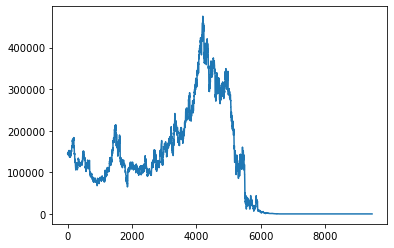

In [109]:
plt.plot(data['YRCW'])

In [110]:
df = data
df = df.dropna(axis=1, how='any')

In [111]:
df.describe()

,AA,AAPL,ABMD,ABT,ADBE,ADI,ADM,ADP,ADSK,AEP,...,WY,X,XEL,XL,XLNX,XOM,XRAY,XRX,YRCW,ZION
count,9459.000000,9459.000000,9459.000000,9459.000000,9459.000000,9459.000000,9459.000000,9459.000000,9459.000000,9459.000000,...,9459.000000,9459.000000,9459.000000,9459.000000,9459.00000,9459.000000,9459.000000,9459.000000,9459.000000,9459.000000
mean,37.738697,39.960070,42.262008,22.209420,47.648056,32.660868,21.586809,40.889298,35.345257,28.942039,...,16.624939,31.530904,18.013454,34.312733,28.45954,45.357700,27.510228,32.874184,106369.946519,34.278650
std,17.757320,55.492022,80.441058,16.687665,60.738639,24.411225,12.867943,34.876162,35.976634,18.610175,...,7.802130,23.415861,12.637752,15.823420,22.18081,25.251079,17.588921,21.038429,112806.538215,17.359362
min,10.776000,0.408100,2.125000,3.203700,2.006400,2.348200,5.457300,6.071100,4.132000,8.206200,...,5.429500,6.490000,2.846700,2.143900,1.80580,7.208900,4.093600,8.597800,2.660000,5.892600
25%,22.443250,1.235950,7.313000,11.922300,13.004900,16.102100,9.356800,21.115600,8.667500,15.881200,...,10.519550,18.950300,9.395750,19.365500,15.19400,23.208300,9.285400,20.968000,18.215000,20.739500
50%,32.538000,9.346500,12.740000,16.565800,29.790000,26.789400,20.802900,27.929300,28.800000,21.443700,...,14.378000,23.956700,12.850500,34.309300,21.70750,45.625500,26.577800,27.654300,101587.581400,32.459300
75%,53.887700,67.826500,23.425000,29.759200,43.745000,42.458300,31.334350,46.502900,44.175000,35.274500,...,22.547800,35.257450,22.972400,49.283150,38.23640,70.704500,39.108750,33.937350,159917.470700,46.122700
max,92.112700,229.392100,449.750000,88.740000,311.270000,124.640000,50.545500,169.610000,178.210000,91.760000,...,37.981800,174.265900,61.930000,63.386200,139.26320,88.898500,68.076300,121.680000,475500.047600,77.687200


In [112]:
df.columns

Index(['Date', 'AA', 'AAPL', 'ABMD', 'ABT', 'ADBE', 'ADI', 'ADM', 'ADP',
       'ADSK',
       ...
       'WY', 'X', 'XEL', 'XL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'YRCW', 'ZION'],
      dtype='object', length=391)

In [113]:
cols = []
for i in df.columns:
  cols.append(i)

In [114]:
cols.remove('Date')

In [115]:
a = 0
for i in cols:
  a = df.at[0,i]
  for j in range(1,9459):
    df.at[j,i] = df.at[j,i]/a
df.head()

,Date,AA,AAPL,ABMD,ABT,ADBE,ADI,ADM,ADP,ADSK,...,WY,X,XEL,XL,XLNX,XOM,XRAY,XRX,YRCW,ZION
0,1993-09-07,13.628500,0.804400,3.750000,3.265900,2.371200,2.960800,6.843800,6.102400,5.352500,...,6.780300,20.543400,6.969600,12.314900,2.534200,8.019800,5.303600,20.550300,144439.512100,7.167500
1,1993-09-08,0.981164,1.019020,1.166667,0.980955,1.025641,0.980309,0.994711,0.997444,0.989239,...,0.981063,0.992187,1.000000,0.994779,0.976048,1.007693,0.966212,1.000000,0.994819,0.973366
2,1993-09-09,0.988018,0.990428,1.166667,1.000000,0.974359,1.014793,0.989421,0.994871,0.991929,...,0.971609,0.996096,0.994691,0.994779,1.017954,0.998080,0.966212,0.988015,0.994819,0.970408
3,1993-09-10,0.982881,1.000000,1.100000,1.000000,1.000000,1.049277,0.994711,1.007718,1.016123,...,0.987375,1.007813,1.005294,0.994779,1.068858,1.009614,1.000000,0.993153,1.005181,1.005916
4,1993-09-11,0.982881,1.000000,1.100000,1.000000,1.000000,1.049277,0.994711,1.007718,1.016123,...,0.987375,1.007813,1.005294,0.994779,1.068858,1.009614,1.000000,0.993153,1.005181,1.005916


In [116]:
for i in cols:
  df.at[0,i] = 1

In [117]:
df.head()

,Date,AA,AAPL,ABMD,ABT,ADBE,ADI,ADM,ADP,ADSK,...,WY,X,XEL,XL,XLNX,XOM,XRAY,XRX,YRCW,ZION
0,1993-09-07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1993-09-08,0.981164,1.019020,1.166667,0.980955,1.025641,0.980309,0.994711,0.997444,0.989239,...,0.981063,0.992187,1.000000,0.994779,0.976048,1.007693,0.966212,1.000000,0.994819,0.973366
2,1993-09-09,0.988018,0.990428,1.166667,1.000000,0.974359,1.014793,0.989421,0.994871,0.991929,...,0.971609,0.996096,0.994691,0.994779,1.017954,0.998080,0.966212,0.988015,0.994819,0.970408
3,1993-09-10,0.982881,1.000000,1.100000,1.000000,1.000000,1.049277,0.994711,1.007718,1.016123,...,0.987375,1.007813,1.005294,0.994779,1.068858,1.009614,1.000000,0.993153,1.005181,1.005916
4,1993-09-11,0.982881,1.000000,1.100000,1.000000,1.000000,1.049277,0.994711,1.007718,1.016123,...,0.987375,1.007813,1.005294,0.994779,1.068858,1.009614,1.000000,0.993153,1.005181,1.005916


In [118]:
df['Date'] = pd.to_datetime(df['Date'])
df

<ipython-input-118-e0d9d975d684>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


,Date,AA,AAPL,ABMD,ABT,ADBE,ADI,ADM,ADP,ADSK,...,WY,X,XEL,XL,XLNX,XOM,XRAY,XRX,YRCW,ZION
0,1993-09-07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1993-09-08,0.981164,1.019020,1.166667,0.980955,1.025641,0.980309,0.994711,0.997444,0.989239,...,0.981063,0.992187,1.000000,0.994779,0.976048,1.007693,0.966212,1.000000,0.994819,0.973366
2,1993-09-09,0.988018,0.990428,1.166667,1.000000,0.974359,1.014793,0.989421,0.994871,0.991929,...,0.971609,0.996096,0.994691,0.994779,1.017954,0.998080,0.966212,0.988015,0.994819,0.970408
3,1993-09-10,0.982881,1.000000,1.100000,1.000000,1.000000,1.049277,0.994711,1.007718,1.016123,...,0.987375,1.007813,1.005294,0.994779,1.068858,1.009614,1.000000,0.993153,1.005181,1.005916
4,1993-09-11,0.982881,1.000000,1.100000,1.000000,1.000000,1.049277,0.994711,1.007718,1.016123,...,0.987375,1.007813,1.005294,0.994779,1.068858,1.009614,1.000000,0.993153,1.005181,1.005916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,2019-07-27,1.697179,258.254600,72.709333,26.868551,131.271086,41.137530,5.930916,27.738267,31.385334,...,3.865611,0.739410,8.681990,4.676449,47.656065,9.328163,10.562637,1.675401,0.000023,6.300663
9455,2019-07-28,1.697179,258.254600,72.709333,26.868551,131.271086,41.137530,5.930916,27.738267,31.385334,...,3.865611,0.739410,8.681990,4.676449,47.656065,9.328163,10.562637,1.675401,0.000023,6.300663
9456,2019-07-29,1.696445,260.666335,73.581333,27.113506,129.563090,40.938260,5.976212,27.515404,30.410089,...,3.811041,0.743304,8.749426,4.676449,47.569253,9.394249,10.628630,1.651557,0.000022,6.229508
9457,2019-07-30,1.690575,259.547489,74.461333,27.040020,128.053306,40.853823,5.983518,27.038542,29.946754,...,3.847912,0.764722,8.693469,4.676449,47.158867,9.395496,10.685195,1.595111,0.000022,6.345309


In [119]:
cols.insert(0, 'Date')
cols

['Date',
 'AA',
 'AAPL',
 'ABMD',
 'ABT',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'AEP',
 'AES',
 'AFL',
 'AGN',
 'AIG',
 'AJG',
 'ALK',
 'ALL',
 'AMAT',
 'AMD',
 'AMGN',
 'AN',
 'ANDV',
 'AON',
 'AOS',
 'APA',
 'APC',
 'APD',
 'ASH',
 'ATGE',
 'AVP',
 'AVY',
 'AXP',
 'AZO',
 'BA',
 'BAC',
 'BAX',
 'BBBY',
 'BBT',
 'BBY',
 'BC',
 'BCO',
 'BDX',
 'BEN',
 'BF/B',
 'BGG',
 'BHGE',
 'BIG',
 'BIIB',
 'BK',
 'BLL',
 'BMS',
 'BMY',
 'BSET',
 'BSX',
 'BWA',
 'C',
 'CA',
 'CAG',
 'CAH',
 'CAL',
 'CAR',
 'CAT',
 'CB',
 'CBS',
 'CCK',
 'CCL',
 'CDNS',
 'CELG',
 'CERN',
 'CHD',
 'CHK',
 'CI',
 'CINF',
 'CL',
 'CLF',
 'CLX',
 'CMA',
 'CMCSA',
 'CMI',
 'CMS',
 'CNA',
 'CNP',
 'COG',
 'COO',
 'COP',
 'COST',
 'CPB',
 'CR',
 'CSCO',
 'CSX',
 'CTAS',
 'CTB',
 'CTL',
 'CVS',
 'CVX',
 'D',
 'DD',
 'DDS',
 'DE',
 'DHI',
 'DHR',
 'DIS',
 'DLX',
 'DOV',
 'DRE',
 'DTE',
 'DUK',
 'DVN',
 'EA',
 'ECL',
 'ED',
 'EFX',
 'EHC',
 'EIX',
 'EMR',
 'EOG',
 'EQR',
 'EQT',
 'ES',
 'ESRX',
 'ESV',
 'ETN',
 'ETR',
 'E

In [120]:
df.head()
stocks=df
stocks

,Date,AA,AAPL,ABMD,ABT,ADBE,ADI,ADM,ADP,ADSK,...,WY,X,XEL,XL,XLNX,XOM,XRAY,XRX,YRCW,ZION
0,1993-09-07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1993-09-08,0.981164,1.019020,1.166667,0.980955,1.025641,0.980309,0.994711,0.997444,0.989239,...,0.981063,0.992187,1.000000,0.994779,0.976048,1.007693,0.966212,1.000000,0.994819,0.973366
2,1993-09-09,0.988018,0.990428,1.166667,1.000000,0.974359,1.014793,0.989421,0.994871,0.991929,...,0.971609,0.996096,0.994691,0.994779,1.017954,0.998080,0.966212,0.988015,0.994819,0.970408
3,1993-09-10,0.982881,1.000000,1.100000,1.000000,1.000000,1.049277,0.994711,1.007718,1.016123,...,0.987375,1.007813,1.005294,0.994779,1.068858,1.009614,1.000000,0.993153,1.005181,1.005916
4,1993-09-11,0.982881,1.000000,1.100000,1.000000,1.000000,1.049277,0.994711,1.007718,1.016123,...,0.987375,1.007813,1.005294,0.994779,1.068858,1.009614,1.000000,0.993153,1.005181,1.005916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,2019-07-27,1.697179,258.254600,72.709333,26.868551,131.271086,41.137530,5.930916,27.738267,31.385334,...,3.865611,0.739410,8.681990,4.676449,47.656065,9.328163,10.562637,1.675401,0.000023,6.300663
9455,2019-07-28,1.697179,258.254600,72.709333,26.868551,131.271086,41.137530,5.930916,27.738267,31.385334,...,3.865611,0.739410,8.681990,4.676449,47.656065,9.328163,10.562637,1.675401,0.000023,6.300663
9456,2019-07-29,1.696445,260.666335,73.581333,27.113506,129.563090,40.938260,5.976212,27.515404,30.410089,...,3.811041,0.743304,8.749426,4.676449,47.569253,9.394249,10.628630,1.651557,0.000022,6.229508
9457,2019-07-30,1.690575,259.547489,74.461333,27.040020,128.053306,40.853823,5.983518,27.038542,29.946754,...,3.847912,0.764722,8.693469,4.676449,47.158867,9.395496,10.685195,1.595111,0.000022,6.345309


# Stocks EDA by Stephanie

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std
import scipy
import datetime
from scipy.optimize import minimize
%matplotlib inline
import scipy.optimize as sco
import scipy.interpolate as sci
import math

In [122]:
start = datetime.datetime(2017,9,7)
end= datetime.datetime(2019,7,31)

In [123]:
stocks_short = stocks[(stocks["Date"] >= start) & (stocks["Date"] <= end)]
stocks_short.dropna(axis=1,inplace=True)

<ipython-input-123-5470bdc14dac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_short.dropna(axis=1,inplace=True)


In [124]:
stocks = stocks_short.columns[1:] # column 0 has the date, so drop that
stocks_return = stocks_short.iloc[-1,1:]/stocks_short.iloc[0,1:]-1 # last/first-1
# calcuate standard variation of time series and divide by first price
stocks_vol = stocks_short.iloc[:,1:].std()/stocks_short.iloc[0,1:] 
sharpe_ratio = stocks_return/stocks_vol # return divided by variance


In [125]:
stocks_return

AA     -0.484909
AAPL    0.318841
ABMD     0.81495
ABT     0.755066
ADBE    0.953046
          ...   
XOM     0.002137
XRAY   -0.011361
XRX     0.074574
YRCW   -0.762332
ZION    0.126292
Length: 390, dtype: object

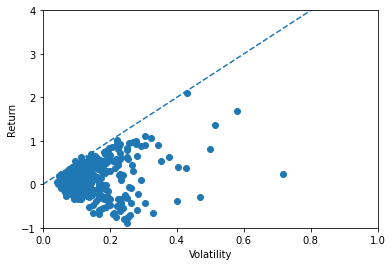

In [126]:
plt.scatter(stocks_vol,stocks_return)
plt.plot([0,1],[0,5],ls='--') # reference line of return = 5*std
plt.xlim([.0,1])
plt.ylim([-1,4])
plt.xlabel('Volatility')
plt.ylabel('Return');

NO indescrepancies obsereved

Text(0.5, 1.0, 'Sharpe Ratio')

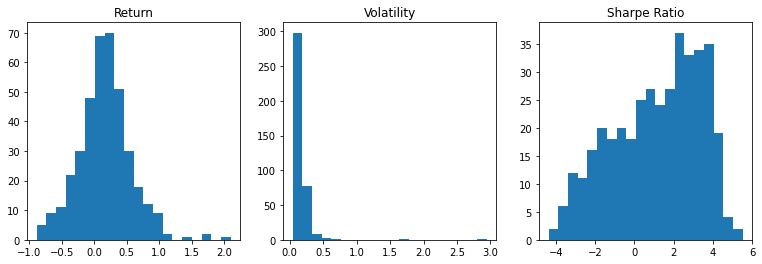

In [127]:
f, axs = plt.subplots(1, 3, figsize=(13,4))
axs[0].hist(stocks_return,20); # but the data in 20 bins
axs[0].set_title('Return')
axs[1].hist(stocks_vol,20);
axs[1].set_title('Volatility')
axs[2].hist(sharpe_ratio,20);
axs[2].set_title('Sharpe Ratio')

Sorting by perfomance and printing the top 20 performing stocks

In [128]:
sharpe_ratio_sorted = pd.Series.sort_values(sharpe_ratio,ascending=False)
sharpe_ratio_sorted.head()

SHW     5.519857
TXN     5.442351
NC      4.898676
FISV    4.785566
CTAS    4.619336
dtype: object

Note that the list is different from the unfiltered one.

I created a random portfolio of NSTOCKS stocks that have a positive return for the period of interest. The list is also different from the unfiltered one

In [129]:
NSTOCKS = 20
# drop all the stocks with negative return and take a random sample of the remainder
stocks_return = stocks_return[stocks_return > 0]
stocks_return

AAPL    0.318841
ABMD     0.81495
ABT     0.755066
ADBE    0.953046
ADI      0.52158
          ...   
XL      0.609635
XLNX    0.903956
XOM     0.002137
XRX     0.074574
ZION    0.126292
Length: 269, dtype: object

In [130]:
 # create a new dataframe with the first column being the dates
portfolio = pd.DataFrame(stocks_short['Date'],columns=['Date'])
for col in stocks_short.columns: # go through all the columns in our original data frame
    if col in stocks_return.index: # check if this column is in the names for our random sample
        portfolio = pd.concat([portfolio,stocks_short[col]],axis=1) # if so, add the stock prices to the new dataframe

<ipython-input-131-69efa9103861>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corrs, dtype=np.bool)) # create a mask to only show entries below the main diagonal


(269.5, -0.5)

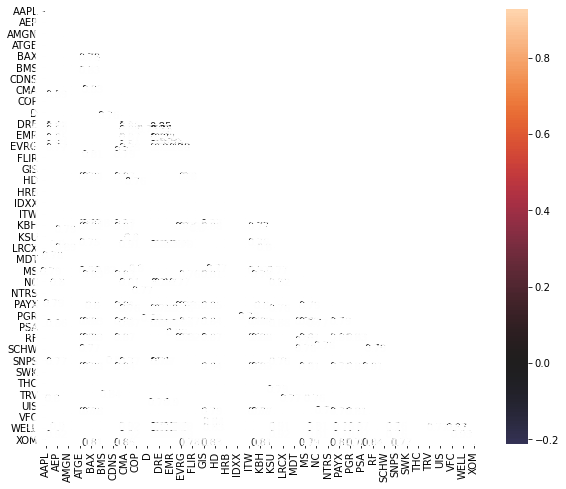

In [131]:
# diff calculates the daily return, then we calculate the correlation between variables
corrs = portfolio.diff(axis=0, periods=1).corr() 
mask = np.triu(np.ones_like(corrs, dtype=np.bool)) # create a mask to only show entries below the main diagonal
f, ax = plt.subplots(figsize=(10, 8))
# plot the heatmap with a colour bar
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5) 
# adjust the top and bottom, so that we can see the whole figure
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [132]:
portfolio.head()

,Date,AAPL,ABMD,ABT,ADBE,ADI,ADP,ADSK,AEP,AES,...,WELL,WFC,WM,WMT,XEL,XL,XLNX,XOM,XRX,ZION
8766,2017-09-07,196.799727,41.026667,15.406840,65.565958,26.849601,17.482728,21.307800,6.430158,2.445892,...,17.894656,14.293565,9.309285,9.443593,6.874053,2.905285,24.768882,9.375458,1.484411,5.633805
8767,2017-09-08,193.590129,41.840000,15.565418,65.511134,26.631113,17.400875,21.380663,6.461513,2.459058,...,18.059121,14.264790,9.436541,9.297434,6.920899,3.074917,24.518586,9.350545,1.469511,5.676066
8768,2017-09-09,193.590129,41.840000,15.565418,65.511134,26.631113,17.400875,21.380663,6.461513,2.459058,...,18.059121,14.264790,9.436541,9.297434,6.920899,3.074917,24.518586,9.350545,1.469511,5.676066
8769,2017-09-10,193.590129,41.840000,15.565418,65.511134,26.631113,17.400875,21.380663,6.461513,2.459058,...,18.059121,14.264790,9.436541,9.297434,6.920899,3.074917,24.518586,9.350545,1.469511,5.676066
8770,2017-09-11,197.092616,42.082667,15.694081,66.156377,27.220413,17.254801,21.761794,6.492867,2.498533,...,18.226000,14.575531,9.509950,9.321008,6.959467,3.229421,24.922934,9.401556,1.492791,5.824653


Code used from: https://www.analyticsvidhya.com/blog/2021/04/portfolio-optimization-using-mpt-in-python/

The code below 
* calculates the covariance matrix on the returns data
* Annualizes the covariance by 252 (those are the trading days in a year)
* computes the portfolio variance by multiplying it with weight vectors 
* computes the square root of the variance calculated above to get the SD. also known as the volatility of the portfolio.

In [133]:
# Getting the variance matrix for portfolio
psy= portfolio.set_index('Date')
varcov = psy.pct_change().apply(lambda x: np.log(x+1)).cov

In [134]:
psy

,AAPL,ABMD,ABT,ADBE,ADI,ADP,ADSK,AEP,AES,AFL,...,WELL,WFC,WM,WMT,XEL,XL,XLNX,XOM,XRX,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-07,196.799727,41.026667,15.406840,65.565958,26.849601,17.482728,21.307800,6.430158,2.445892,21.846677,...,17.894656,14.293565,9.309285,9.443593,6.874053,2.905285,24.768882,9.375458,1.484411,5.633805
2017-09-08,193.590129,41.840000,15.565418,65.511134,26.631113,17.400875,21.380663,6.461513,2.459058,22.017519,...,18.059121,14.264790,9.436541,9.297434,6.920899,3.074917,24.518586,9.350545,1.469511,5.676066
2017-09-09,193.590129,41.840000,15.565418,65.511134,26.631113,17.400875,21.380663,6.461513,2.459058,22.017519,...,18.059121,14.264790,9.436541,9.297434,6.920899,3.074917,24.518586,9.350545,1.469511,5.676066
2017-09-10,193.590129,41.840000,15.565418,65.511134,26.631113,17.400875,21.380663,6.461513,2.459058,22.017519,...,18.059121,14.264790,9.436541,9.297434,6.920899,3.074917,24.518586,9.350545,1.469511,5.676066
2017-09-11,197.092616,42.082667,15.694081,66.156377,27.220413,17.254801,21.761794,6.492867,2.498533,22.367405,...,18.226000,14.575531,9.509950,9.321008,6.959467,3.229421,24.922934,9.401556,1.492791,5.824653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-27,258.254600,72.709333,26.868551,131.271086,41.137530,27.738267,31.385334,8.102864,3.912873,30.067511,...,21.574836,14.700620,14.811759,13.635102,8.681990,4.676449,47.656065,9.328163,1.675401,6.300663
2019-07-28,258.254600,72.709333,26.868551,131.271086,41.137530,27.738267,31.385334,8.102864,3.912873,30.067511,...,21.574836,14.700620,14.811759,13.635102,8.681990,4.676449,47.656065,9.328163,1.675401,6.300663
2019-07-29,260.666335,73.581333,27.113506,129.563090,40.938260,27.515404,30.410089,8.174829,3.940591,29.548625,...,21.725364,14.396469,14.744263,13.544620,8.749426,4.676449,47.569253,9.394249,1.651557,6.229508


In [135]:
returns_portfolio = psy.pct_change()
returns_portfolio.head()

,AAPL,ABMD,ABT,ADBE,ADI,ADP,ADSK,AEP,AES,AFL,...,WELL,WFC,WM,WMT,XEL,XL,XLNX,XOM,XRX,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-08,-0.016309,0.019825,0.010293,-0.000836,-0.008137,-0.004682,0.003420,0.004876,0.005383,0.007820,...,0.009191,-0.002013,0.013670,-0.015477,0.006815,0.058387,-0.010105,-0.002657,-0.010038,0.007501
2017-09-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-09-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-09-11,0.018092,0.005800,0.008266,0.009849,0.022128,-0.008395,0.017826,0.004853,0.016053,0.015891,...,0.009241,0.021784,0.007779,0.002536,0.005573,0.050247,0.016492,0.005455,0.015842,0.026178


# Portfolio expected returns

* code used from: https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/



In [136]:
# Log of percentage change
cov_matrix = psy.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix.head()

,AAPL,ABMD,ABT,ADBE,ADI,ADP,ADSK,AEP,AES,AFL,...,WELL,WFC,WM,WMT,XEL,XL,XLNX,XOM,XRX,ZION
AAPL,0.000199,0.000125,0.000074,0.000130,0.000109,0.000075,0.000141,-0.000002,0.000037,0.000041,...,0.000022,0.000053,0.000036,0.000034,0.000004,-5.661426e-06,0.000134,0.000055,0.000071,0.000053
ABMD,0.000125,0.000468,0.000123,0.000173,0.000122,0.000079,0.000181,-0.000007,0.000037,0.000040,...,0.000013,0.000061,0.000046,0.000041,-0.000006,1.668736e-05,0.000114,0.000060,0.000076,0.000065
ABT,0.000074,0.000123,0.000117,0.000099,0.000073,0.000060,0.000100,0.000013,0.000036,0.000042,...,0.000025,0.000046,0.000035,0.000039,0.000016,1.114420e-05,0.000083,0.000045,0.000058,0.000044
ADBE,0.000130,0.000173,0.000099,0.000274,0.000112,0.000101,0.000214,0.000003,0.000041,0.000044,...,0.000024,0.000052,0.000048,0.000043,0.000011,5.958204e-06,0.000133,0.000053,0.000085,0.000058
ADI,0.000109,0.000122,0.000073,0.000112,0.000195,0.000066,0.000140,-0.000005,0.000029,0.000040,...,0.000011,0.000062,0.000030,0.000031,-0.000002,6.566917e-07,0.000191,0.000051,0.000075,0.000069


In [137]:
# Yearly returns for individual companies
yearly_returns = psy.resample('Y').last().pct_change().mean()
yearly_returns

AAPL    0.136405
ABMD    0.296721
ABT     0.255439
ADBE    0.316572
ADI     0.196176
          ...   
XL      0.325450
XLNX    0.346112
XOM    -0.019849
XRX     0.185427
ZION   -0.031153
Length: 269, dtype: float64

In [138]:
NSAMP = 20000 # set the number of random samples of the weights
NSTOCKS=269
w = np.random.rand(NSTOCKS)
# Portfolio returns
port_returns = (w*yearly_returns).sum()
port_returns

16.425990168861297

### Plotting the efficient frontier

In [139]:
# Volatility is given by the annual standard deviation. We multiply by 253 because there are 253 trading days/year.
ann_sd = psy.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(253))
ann_sd

AAPL    0.224612
ABMD    0.344179
ABT     0.172212
ADBE    0.263132
ADI     0.221879
          ...   
XL      0.199451
XLNX    0.314083
XOM     0.155988
XRX     0.251415
ZION    0.204818
Length: 269, dtype: float64

In [140]:
assets = pd.concat([yearly_returns, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets.head()

,Returns,Volatility
AAPL,0.136405,0.224612
ABMD,0.296721,0.344179
ABT,0.255439,0.172212
ADBE,0.316572,0.263132
ADI,0.196176,0.221879


In [141]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(psy.columns)
num_portfolios = 20000

for p in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, yearly_returns) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(253) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [142]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(psy.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [143]:
expportfolios  = pd.DataFrame(data)
expportfolios.head() # Dataframe of the 20000 portfolios created

,Returns,Volatility,AAPL weight,ABMD weight,ABT weight,ADBE weight,ADI weight,ADP weight,ADSK weight,AEP weight,...,WELL weight,WFC weight,WM weight,WMT weight,XEL weight,XL weight,XLNX weight,XOM weight,XRX weight,ZION weight
0,0.138090,0.109148,0.007477,0.001928,0.001888,0.000453,0.006761,0.000026,0.000995,0.002431,...,0.005498,0.004453,0.002645,0.004842,0.001739,0.000746,0.007395,0.005970,0.003911,0.002861
1,0.122224,0.109830,0.000299,0.007502,0.002693,0.003068,0.003979,0.005855,0.004019,0.000966,...,0.005950,0.002688,0.006198,0.005784,0.000107,0.004456,0.005329,0.002705,0.002847,0.001617
2,0.124419,0.106611,0.005932,0.001090,0.004377,0.003718,0.001714,0.000322,0.000456,0.004860,...,0.003963,0.005419,0.006462,0.005112,0.006869,0.003339,0.006768,0.006958,0.001011,0.004905
3,0.138153,0.107250,0.001133,0.003180,0.003038,0.003375,0.003547,0.006254,0.005861,0.005283,...,0.003978,0.000877,0.006187,0.002767,0.004218,0.003607,0.000654,0.007183,0.004906,0.003433
4,0.129428,0.108491,0.002668,0.002197,0.007636,0.007179,0.002248,0.005196,0.003562,0.005099,...,0.004505,0.006129,0.001546,0.006696,0.003747,0.006154,0.007619,0.000600,0.004804,0.001313


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

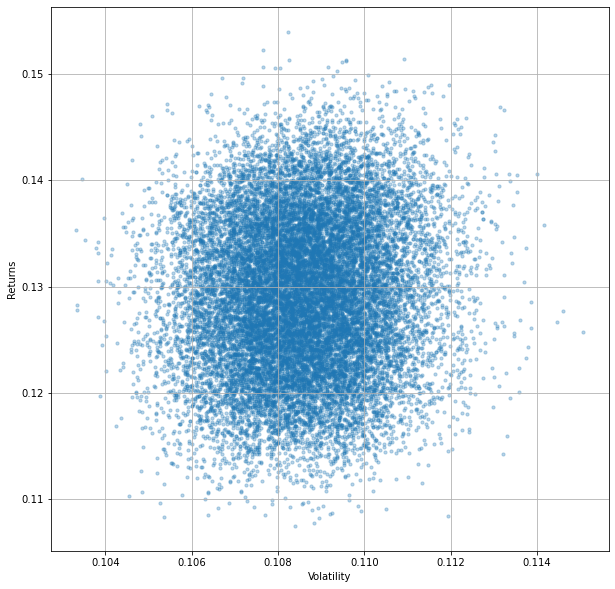

In [144]:
# Plot efficient frontier
expportfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

# Reading the efficient Frontier

In [145]:
min_vol_port = expportfolios.iloc[expportfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns        0.135314
Volatility     0.103319
AAPL weight    0.000403
ABMD weight    0.002520
ABT weight     0.004910
                 ...   
XL weight      0.003937
XLNX weight    0.004171
XOM weight     0.001145
XRX weight     0.003036
ZION weight    0.004963
Name: 6688, Length: 271, dtype: float64

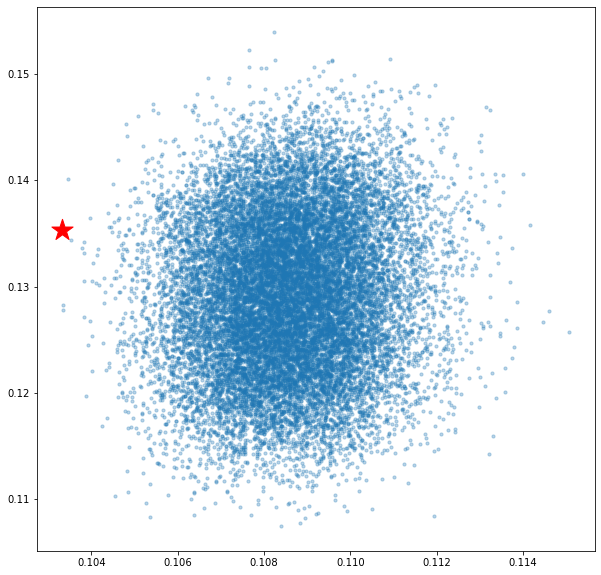

In [146]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(expportfolios['Volatility'], expportfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

## Optimal Risky Portfolio
* An optimal risky portfolio can be considered as one that has highest Sharpe ratio.

Let’s find out.

In [147]:
# Finding the optimal portfolio
rf = 0.1 # risk factor
optimal_risky_port = expportfolios.iloc[((expportfolios['Returns']-rf)/expportfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        0.153993
Volatility     0.108234
AAPL weight    0.005768
ABMD weight    0.006710
ABT weight     0.002626
                 ...   
XL weight      0.006949
XLNX weight    0.006897
XOM weight     0.001184
XRX weight     0.000432
ZION weight    0.007051
Name: 11751, Length: 271, dtype: float64

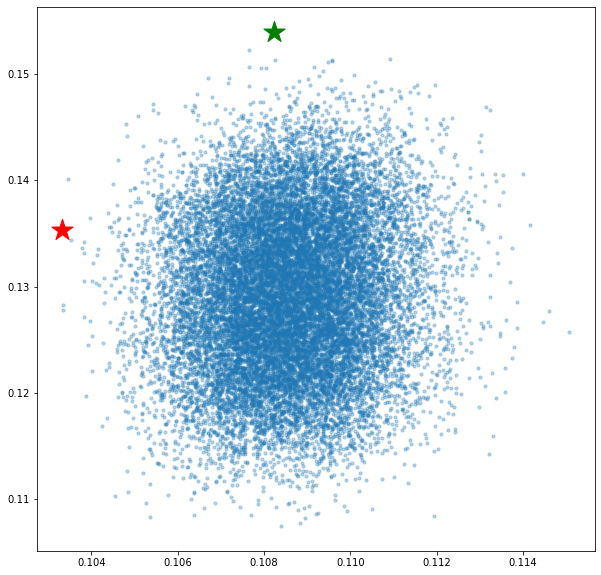

In [148]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(expportfolios['Volatility'], expportfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

Code used from: https://www.analyticsvidhya.com/blog/2021/04/portfolio-optimization-using-mpt-in-python/ 
CONTINUED

In [149]:
variance_matrix1 = returns_portfolio.cov()*252
variance_matrix1

,AAPL,ABMD,ABT,ADBE,ADI,ADP,ADSK,AEP,AES,AFL,...,WELL,WFC,WM,WMT,XEL,XL,XLNX,XOM,XRX,ZION
AAPL,0.049951,0.031349,0.018590,0.032715,0.027255,0.018877,0.035162,-0.000374,0.009357,0.010182,...,0.005594,0.013187,0.008972,0.008692,0.000929,-0.001441,0.033536,0.013660,0.017718,0.013246
ABMD,0.031349,0.116575,0.030979,0.043415,0.030634,0.019766,0.045392,-0.001660,0.009287,0.010065,...,0.003337,0.015257,0.011849,0.010267,-0.001479,0.004515,0.028550,0.015139,0.018591,0.016418
ABT,0.018590,0.030979,0.029504,0.025102,0.018226,0.015172,0.025131,0.003309,0.009123,0.010429,...,0.006196,0.011406,0.008869,0.009702,0.004096,0.002994,0.020982,0.011390,0.014421,0.010946
ADBE,0.032715,0.043415,0.025102,0.069512,0.028104,0.025400,0.053712,0.000884,0.010487,0.011075,...,0.006077,0.013021,0.012321,0.011084,0.002960,0.001606,0.033743,0.013396,0.021414,0.014530
ADI,0.027255,0.030634,0.018226,0.028104,0.049014,0.016640,0.034986,-0.001318,0.007210,0.010010,...,0.002733,0.015558,0.007584,0.007805,-0.000415,0.000328,0.048287,0.012734,0.018916,0.017256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XL,-0.001441,0.004515,0.002994,0.001606,0.000328,0.003147,0.001736,0.002893,0.000606,0.002450,...,0.002999,0.001889,0.001765,0.002784,0.002590,0.047506,-0.000872,0.000716,0.003206,0.005593
XLNX,0.033536,0.028550,0.020982,0.033743,0.048287,0.021509,0.042492,-0.004044,0.010372,0.010755,...,0.002742,0.018564,0.008943,0.008747,-0.002898,-0.000872,0.099062,0.014818,0.027803,0.021378
XOM,0.013660,0.015139,0.011390,0.013396,0.012734,0.011281,0.014676,0.001448,0.007117,0.008901,...,0.002067,0.012452,0.007384,0.008378,0.002616,0.000716,0.014818,0.024107,0.013501,0.010748
XRX,0.017718,0.018591,0.014421,0.021414,0.018916,0.014776,0.024643,0.002158,0.011117,0.010182,...,0.007584,0.014228,0.007447,0.010490,0.002947,0.003206,0.027803,0.013501,0.062108,0.017288


In [150]:
varcov

<bound method DataFrame.cov of                 AAPL      ABMD       ABT      ADBE       ADI       ADP  \
Date                                                                     
2017-09-07       NaN       NaN       NaN       NaN       NaN       NaN   
2017-09-08 -0.016443  0.019631  0.010240 -0.000837 -0.008171 -0.004693   
2017-09-09  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-09-10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-09-11  0.017931  0.005783  0.008232  0.009801  0.021887 -0.008430   
...              ...       ...       ...       ...       ...       ...   
2019-07-27  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2019-07-28  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2019-07-29  0.009295  0.011922  0.009076 -0.013097 -0.004856 -0.008067   
2019-07-30 -0.004301  0.011889 -0.002714 -0.011721 -0.002065 -0.017483   
2019-07-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

      

In [151]:
stocks = psy.columns[1:] # column 0 has the date, so drop that
psy_return = psy.iloc[-1,1:]/psy.iloc[0,1:]-1 # last/first-1
# calcuate standard variation of time series and divide by first price
psy_vol = psy.iloc[:,1:].std()/psy.iloc[0,1:] 
sharpe_ratio = psy_return/psy_vol # return divided by variance

psy_vol

ABMD    0.498484
ABT     0.187759
ADBE    0.256865
ADI     0.125219
ADP     0.176211
          ...   
XL      0.231774
XLNX    0.342353
XOM     0.050233
XRX     0.115259
ZION    0.103145
Length: 268, dtype: float64

In [152]:
print('Portfolio Volatility(Risk) for', psy_vol)
print('Portfolio Sharpe_Ratio for', sharpe_ratio)

Portfolio Volatility(Risk) for ABMD    0.498484
ABT     0.187759
ADBE    0.256865
ADI     0.125219
ADP     0.176211
          ...   
XL      0.231774
XLNX    0.342353
XOM     0.050233
XRX     0.115259
ZION    0.103145
Length: 268, dtype: float64
Portfolio Sharpe_Ratio for ABMD    1.634856
ABT     4.021454
ADBE    3.710299
ADI     4.165360
ADP     3.101877
          ...   
XL      2.630296
XLNX    2.640423
XOM     0.042547
XRX     0.647018
ZION    1.224412
Length: 268, dtype: float64


In [153]:
# computing portfolio variance
# portfolio_var= np.transpose(varcov)@variance_matrix1@weight_portfolio

In [154]:
# returnsafter = returns_portfolio[stocks_return > 0]
# returnsafter
#  Not sure what this is doing

Code from: https://builtin.com/data-science/portfolio-optimization-python

Attempts to carry out mean variance optimization 

In [155]:
pip install PyPortfolioOpt

In [156]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

mu = mean_historical_return(psy)
s = CovarianceShrinkage(psy).ledoit_wolf()

In [157]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu,s)
weights = ef.max_sharpe

In [158]:
cleaned_weights= ef.clean_weights
cleaned_weights

<bound method BaseOptimizer.clean_weights of <pypfopt.efficient_frontier.efficient_frontier.EfficientFrontier object at 0x0000027375037130>>

In [159]:
# supposed to print the annual return, Volatility and Sharpe Ratio
# ef.portfolio_performance(verbose=True)

In [160]:
# df.head()
# stocks=df
# stocks.head()

# stocks is either the dataframe or column 0 has the date

Using code from https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/

In [161]:
# stocks.head()

Code from: https://www.kenwuyang.com/en/post/portfolio-optimization-with-python/

In [162]:
# Analyzing the daily returns of all the stocks over the years.
# We multiply by 253/252 because those are the trading days in a year 
returns_portfolio.mean() * 253

AAPL    0.126339
ABMD    0.276902
ABT     0.220544
ADBE    0.279512
ADI     0.178087
          ...   
XL      0.195169
XLNX    0.284883
XOM     0.012907
XRX     0.057701
ZION    0.064399
Length: 269, dtype: float64

In [163]:
#The annualized variance-covariance matrix of the returns can be computed
#  using built-in pandas method cov:
returns_portfolio.cov() * 253

,AAPL,ABMD,ABT,ADBE,ADI,ADP,ADSK,AEP,AES,AFL,...,WELL,WFC,WM,WMT,XEL,XL,XLNX,XOM,XRX,ZION
AAPL,0.050149,0.031474,0.018664,0.032845,0.027363,0.018952,0.035302,-0.000375,0.009394,0.010222,...,0.005616,0.013239,0.009008,0.008726,0.000932,-0.001447,0.033669,0.013714,0.017788,0.013298
ABMD,0.031474,0.117037,0.031102,0.043588,0.030756,0.019844,0.045572,-0.001667,0.009324,0.010105,...,0.003351,0.015317,0.011896,0.010308,-0.001485,0.004533,0.028663,0.015199,0.018664,0.016483
ABT,0.018664,0.031102,0.029621,0.025201,0.018298,0.015232,0.025231,0.003322,0.009159,0.010470,...,0.006221,0.011452,0.008904,0.009740,0.004112,0.003006,0.021065,0.011436,0.014478,0.010989
ADBE,0.032845,0.043588,0.025201,0.069788,0.028216,0.025501,0.053925,0.000887,0.010529,0.011119,...,0.006101,0.013073,0.012370,0.011128,0.002971,0.001612,0.033876,0.013449,0.021499,0.014588
ADI,0.027363,0.030756,0.018298,0.028216,0.049209,0.016706,0.035125,-0.001323,0.007239,0.010050,...,0.002744,0.015620,0.007614,0.007836,-0.000416,0.000329,0.048479,0.012785,0.018991,0.017325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XL,-0.001447,0.004533,0.003006,0.001612,0.000329,0.003160,0.001743,0.002905,0.000608,0.002459,...,0.003010,0.001896,0.001772,0.002795,0.002600,0.047694,-0.000876,0.000719,0.003218,0.005615
XLNX,0.033669,0.028663,0.021065,0.033876,0.048479,0.021594,0.042660,-0.004060,0.010414,0.010797,...,0.002752,0.018637,0.008979,0.008782,-0.002910,-0.000876,0.099455,0.014877,0.027913,0.021463
XOM,0.013714,0.015199,0.011436,0.013449,0.012785,0.011326,0.014734,0.001454,0.007145,0.008936,...,0.002076,0.012501,0.007413,0.008411,0.002626,0.000719,0.014877,0.024202,0.013554,0.010791
XRX,0.017788,0.018664,0.014478,0.021499,0.018991,0.014834,0.024741,0.002166,0.011161,0.010222,...,0.007614,0.014284,0.007476,0.010531,0.002958,0.003218,0.027913,0.013554,0.062354,0.017356


In [164]:
returns_portfolio.corr()

,AAPL,ABMD,ABT,ADBE,ADI,ADP,ADSK,AEP,AES,AFL,...,WELL,WFC,WM,WMT,XEL,XL,XLNX,XOM,XRX,ZION
AAPL,1.000000,0.410821,0.484245,0.555193,0.550823,0.514442,0.519549,-0.012896,0.218554,0.328313,...,0.144221,0.332492,0.301067,0.220177,0.031453,-0.029588,0.476744,0.393650,0.318099,0.290562
ABMD,0.410821,1.000000,0.528233,0.482294,0.405266,0.352598,0.439038,-0.037503,0.142000,0.212451,...,0.056326,0.251811,0.260271,0.170246,-0.032786,0.060670,0.265671,0.285575,0.218484,0.235755
ABT,0.484245,0.528233,1.000000,0.554286,0.479281,0.537976,0.483171,0.148548,0.277270,0.437575,...,0.207870,0.374209,0.387223,0.319786,0.180483,0.079982,0.388105,0.427103,0.336882,0.312436
ADBE,0.555193,0.482294,0.554286,1.000000,0.481482,0.586784,0.672765,0.025843,0.207658,0.302739,...,0.132824,0.278318,0.350477,0.238028,0.084971,0.027949,0.406626,0.327247,0.325906,0.270202
ADI,0.550823,0.405266,0.479281,0.481482,1.000000,0.457785,0.521864,-0.045908,0.170024,0.325853,...,0.071139,0.396015,0.256903,0.199589,-0.014177,0.006795,0.692978,0.370460,0.342841,0.382141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XL,-0.029588,0.060670,0.079982,0.027949,0.006795,0.087948,0.026299,0.102375,0.014504,0.081001,...,0.079279,0.048834,0.060743,0.072304,0.089951,1.000000,-0.012716,0.021163,0.059016,0.125811
XLNX,0.476744,0.265671,0.388105,0.406626,0.692978,0.416226,0.445834,-0.099092,0.172046,0.246259,...,0.050194,0.332366,0.213102,0.157351,-0.069708,-0.012716,1.000000,0.303222,0.354457,0.333011
XOM,0.393650,0.285575,0.427103,0.327247,0.370460,0.442545,0.312146,0.071930,0.239306,0.413162,...,0.076732,0.451932,0.356657,0.305501,0.127537,0.021163,0.303222,1.000000,0.348908,0.339395
XRX,0.318099,0.218484,0.336882,0.325906,0.342841,0.361110,0.326542,0.066768,0.232877,0.294434,...,0.175360,0.321717,0.224097,0.238307,0.089501,0.059016,0.354457,0.348908,1.000000,0.340096


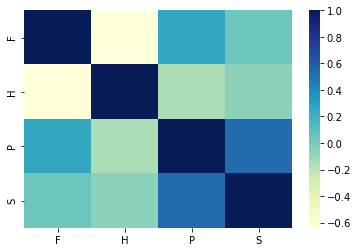

In [165]:
from numpy.random      import randn
from pandas            import DataFrame
from seaborn           import heatmap
from matplotlib.pyplot import show
from itertools         import combinations

def absHighPass(returns_portfolio, absThresh):
    passed = set()
    for (r,c) in combinations(returns_portfolio.columns, 2):
      if (abs(returns_portfolio.loc[r,c]) >= absThresh):
        passed.add(r)
        passed.add(c)
    passed = sorted(passed)
    return returns_portfolio.loc[passed,passed]

labels = [chr(x) for x in range(65,91)]
corrDf = DataFrame(randn(26,26), index=labels, columns=labels).corr()

#heatmap(corrDf,cmap="YlGnBu")

try:
    heatmap(absHighPass(corrDf,0.5),cmap="YlGnBu")
except ValueError:  #raised if `y` is empty.
    pass


<ipython-input-166-d27286426278>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corrs, dtype=np.bool))


(269.5, -0.5)

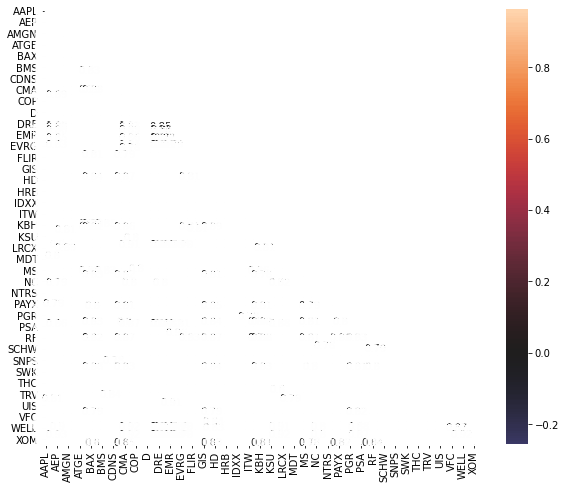

In [166]:
corrs = returns_portfolio.corr() 
# create a mask to only show entries below the main diagonal
mask = np.triu(np.ones_like(corrs, dtype=np.bool)) 
f, ax = plt.subplots(figsize=(10, 8))
# plot the heatmap with a colour bar
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5) 
# adjust the top and bottom, so that we can see the whole figure
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Using the monte carlo simulation, The annualized variance-covariance matrix of the returns can be computed using built-in pandas method cov:

The codes below look at returns and standard deviation.

In [167]:
#  daily returns = returns_portfolio
# Function for computing portfolio return
def portfolio_returns(weights):
  port = (np.sum(returns_portfolio.mean() * weights)) * 253
  return port

In [168]:
# returns_portfolio

In [169]:
#  Standard Deviation of the portfolio returns
# Function for computing standard deviation of portfolio returns
def portfolio_sd(weights):
  sdv = np.sqrt(np.transpose(weights) @ (returns_portfolio.cov() * 253) @ weights)
  return sdv

### Monte Carlo Simulation

* The empty containers we instantiate are lists; they are mutable and so growing them will not be memory inefficient.

In [170]:
# weights.shape

In [171]:
# NSTOCKS

In [172]:
# symbols will either be the top 20 performing stocks or the columns of stocks

symbols = 269
symbols

269

In [173]:
# instantiate empty array containers for returns and sd
list_portfolio_returns = []
list_portfolio_sd = []
p_weights = [] # Define an empty array for asset weights

# For loop to simulate 2000 random weight vectors (numpy array objects)
for p in range(10):
  # Return random floats in the half-open interval [0.0, 1.0)
  weights = np.random.random(symbols) 
  # Normalize to unity
  # The /= operator divides the array by the sum of the array and rebinds "weights" to the new object
  weights /= np.sum(weights) 
  p_weights.append(weights)

  # Lists are mutable so growing will not be memory inefficient
  list_portfolio_returns.append(portfolio_returns(weights))
  list_portfolio_sd.append(portfolio_sd(weights)) # do append and calculation separate

  # Convert list to numpy arrays
  port_returns = np.array(object = list_portfolio_returns)
  port_sd = np.array(object = list_portfolio_sd)


In [174]:
# Max expected return
round(max(port_returns), 4)
# Min expected return

0.1789

In [175]:
round(min(port_returns), 4)

0.1345

while, the highest and lowest volatility measures are recorded as:

In [176]:
# Max sd
round(max(port_sd), 4)
# Min sd

0.1348

In [177]:
round(min(port_sd), 4)

0.107

In [178]:
# # Plotting optimal portfolio
# plt.subplots(figsize=(10, 10))
# plt.scatter(expportfolios['Volatility'], expportfolios['Returns'],marker='o', s=10, alpha=0.3)
# plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
# plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', 

In [179]:
pip install pyensae

Note: you may need to restart the kernel to use updated packages.


In [180]:
pip install antlr4-python3-runtime==4.9

Note: you may need to restart the kernel to use updated packages.


In [181]:
# Plot the sub-optimal portfolios
rscript= """
plotly::plot_ly(
  x = py$port_sd, y = py$port_returns, color = (py$port_returns / py$port_sd),
  mode = "markers", type = "scattergl", showlegend = FALSE,
  marker = list(size = 5, opacity = 0.7)
) %>%
  plotly::layout(
    title = "Mean-Standard Deviation Diagram",
    yaxis = list(title = "Expected Portfolio Return (Annualized)", tickformat = ".2%"),
    xaxis = list(title = "Portoflio Standard Deviation (Annualized)", tickformat = ".2%")
  ) %>% 
  plotly::colorbar(title = "Sharpe Ratio")
  """

from pyensae.languages import r2python
print(r2python(rscript, pep8=True))

ImportError: cannot import name 'r2python' from 'pyensae.languages' (C:\Users\Admin\anaconda3\lib\site-packages\pyensae\languages\__init__.py)

In [ ]:
pip install r2python

In [ ]:
pip install r2python

In [ ]:
pip install Languages

In [ ]:
weights= np.random.rand(NSTOCKS)
portfolio_return = returns_portfolio.dot(weights)
portfolio_return

The higher the number of samples the more concentrated the scatter plot is.

In [ ]:
NSAMP = 2000 # set the number of random samples of the weights
result_array = np.zeros((2, NSAMP)) # create a numpy array to store the returns and risk for each sample
Ro = portfolio.iloc[0,1:] # store the initial stock prices
R = portfolio.iloc[-1,1:] # store the final stock prices
for i in range(NSAMP): # loop over all the samples
    w = np.random.rand(NSTOCKS) # generates weights in the range [0,1] for all the stockes
    # calculate the initial value of the stock portfolio, @ => multiply two matrices, .T => transpose of matrix
    Po = w.T @ Ro
    w = w/Po # normalize random numbers so that portfolio has an initial value of 1
    Pf = w.T @ R # calculate final value of portfolio
    risk = np.sqrt(w.T @ corrs @ w) # use the formula above to calculate the risk
    result_array[:,i] = [risk,Pf-1] # store risk and return
# plot risk vs returns and add axis labels
plt.scatter(result_array[0,:],result_array[1,:]) 
plt.xlabel('Risk')
plt.ylabel('Return')

In [ ]:
NSAMP = 2000 # set the number of random samples of the weights
result_array = np.zeros((2, NSAMP)) # create a numpy array to store the returns and risk for each sample
Ro = portfolio.iloc[0,1:] # store the initial stock prices
R = portfolio.iloc[-1,1:] # store the final stock prices
w =[0.2,0.4,0.3,0.1]

for i in range(NSAMP): # loop over all the samples
    w = np.random.rand(NSTOCKS) # generates weights in the range [0,1] for all the stockes
    # calculate the initial value of the stock portfolio, @ => multiply two matrices, .T => transpose of matrix
    Po = w.T @ Ro
    w = w/Po # normalize random numbers so that portfolio has an initial value of 1
    Pf = w.T @ R # calculate final value of portfolio
    risk = np.sqrt(w.T @ corrs @ w) # use the formula above to calculate the risk
    result_array[:,i] = [risk,Pf-1] # store risk and return
# plot risk vs returns and add axis labels
plt.scatter(result_array[0,:],result_array[1,:]) 
plt.xlabel('Risk')
plt.ylabel('Return')

## Sharpe ratio
(continued) 
ignore this

# New Section

In [ ]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('fivethirtyeight')
%matplotlib inline
stocks

In [ ]:
portfolio.head()

I was trying to make a time series graph for the top 20 stocks at a given time. However, the stock list changes everytime I run all the codes of the notebook. I made sure that the code did not randomise the the stock picks each time, but that doesnt seem to work. 

In [ ]:
# portfolio.plot(x='Date',y=['AN','ANDV','ATGE','BBT','BDX','CAT','CNP','CR','DE','EQR','FISV','IBM','ITT','LOW','MRO','PH','SHW','SVU','T','THC'])
# plt.xlabel('Date')         
# plt.ylabel('The stock')
# plt.xticks(rotation=45);

In [ ]:
# # The below will pull back stock prices from the start date until end date specified.
# start_sp = datetime.datetime(2010, 1, 1)
# end_sp = datetime.datetime(2019, 7, 31)

# # This variable is used for YTD performance.
# end_of_last_year = datetime.datetime(2018, 12, 29)

# # These are separate if for some reason want different date range than SP.
# stocks_start = datetime.datetime(2010, 1, 1)
# stocks_end = datetime.datetime(2019, 7, 31)

In [ ]:
# stocks.plot(x='Date',y=['AAPL','ADBE','ABT','NC','FISV','CTAS','SHW'])
# plt.xlabel('Date')         
# plt.ylabel('The stock')
# plt.xticks(rotation=45);

In [ ]:
# stocks_diff = stocks.diff
# stocks_diff

In [ ]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# from matplotlib import style

# # Adjusting the size of matplotlib
# import matplotlib as mpl
# mpl.rc('figure', figsize=(8, 7))
# mpl.__version__

# # Adjusting the style of matplotlib
# style.use('ggplot')

# stocks.plot(label='AAPL')
# stocks.plot(label='ADBE')
# plt.legend()

In [ ]:
portfolio.plot()

In [ ]:
# start = datetime.datetime(2017,9,7)
# end= datetime.datetime(2019,7,31)
# morning_data_three_sites = stocks.loc[start:end, ["SHW", "TXN", "NC"]]
# # Plots each column as a different line, over the time range in the filtered dataframe.
# morning_data_three_sites.plot.line();

In [ ]:
# plt.figure(figsize=(12, 10))
# plt.scatter(rets.mean(), rets.std(), area)
# plt.xlabel('Expected return')
# plt.ylabel('Risk')

# for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
#     plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',arrowprops=dict(
#     arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
sns.jointplot('SHW', 'TXN', stocks, kind='scatter', color='seagreen')

In [ ]:
# sns.pairplot(stocks,kind='reg')

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  company[‘Volume’].plot()
plt.ylabel(‘Volume’)
# plt.xlabel(None)
plt.title(f”{tech_list[i — 1]}”)

In [ ]:
# stocks["2019-05-20":"2019-05-21"].plot();

In [ ]:
# # visualize the stock_data
# stocks.plt(subplots=True, title='Stock Data')

# # summarize the stock_data
# print(stocks.describe())
# plt.show()

In [ ]:
# sharpe_ratio(BBT['Daily Return'])

In [ ]:
# sharpe_ratio(AAPL['Daily Return'])

In [ ]:
df[cols].set_index('Date').plot()

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/Shareddrives/ADS2002 Portfolio Optimisation/Data/NoNaNs.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

In [ ]:
returns_portfolio.shape